In [135]:
%matplotlib inline
import geopandas

from weavingspace import WeaveUnit
from weavingspace import TileUnit
from weavingspace import Tiling

In [136]:
us = geopandas.read_file("data/states.gpkg")
us = us[us.state != "DC"]
us['Democrat'] = us.dem / us.votes * 100
us['Republican'] = us.gop / us.votes * 100
us['Green'] = us.grn / us.votes * 100
us['Libertarian'] = us.lib / us.votes * 100

In [137]:
# us["FID"] = list(range(us.shape[0]))

In [181]:
w3 = WeaveUnit(spacing = 25000, aspect = 0.8, weave_type = "twill", n = 3, 
               strands = "(aab)|(ccd)", crs = us.crs)
w3 = TileUnit(spacing = 72000, tiling_type = "hex-colouring", n = 4, 
              crs = us.crs)

w3 = w3.inset_tile(2400)

<AxesSubplot:>

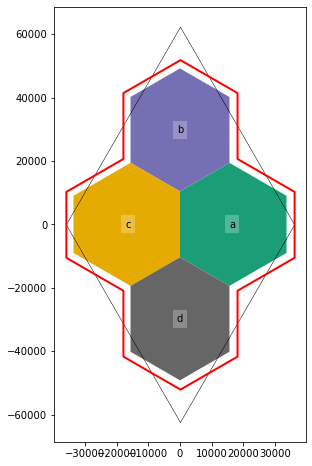

In [182]:
w3.plot(show_ids = True)

In [183]:
tiling = Tiling(w3, us, id_var = "state")

In [184]:
election_map = tiling.get_tiled_map(rotation = 15, prioritise_tiles = True)

In [185]:
election_map.variables = dict(zip(list("abcd"), 
                                  ["Democrat", "Green", "Republican", "Libertarian"]))
election_map.colourmaps = dict(zip(election_map.variables.values(),
                                   ("Blues", "Greens", "Reds", "Purples")))

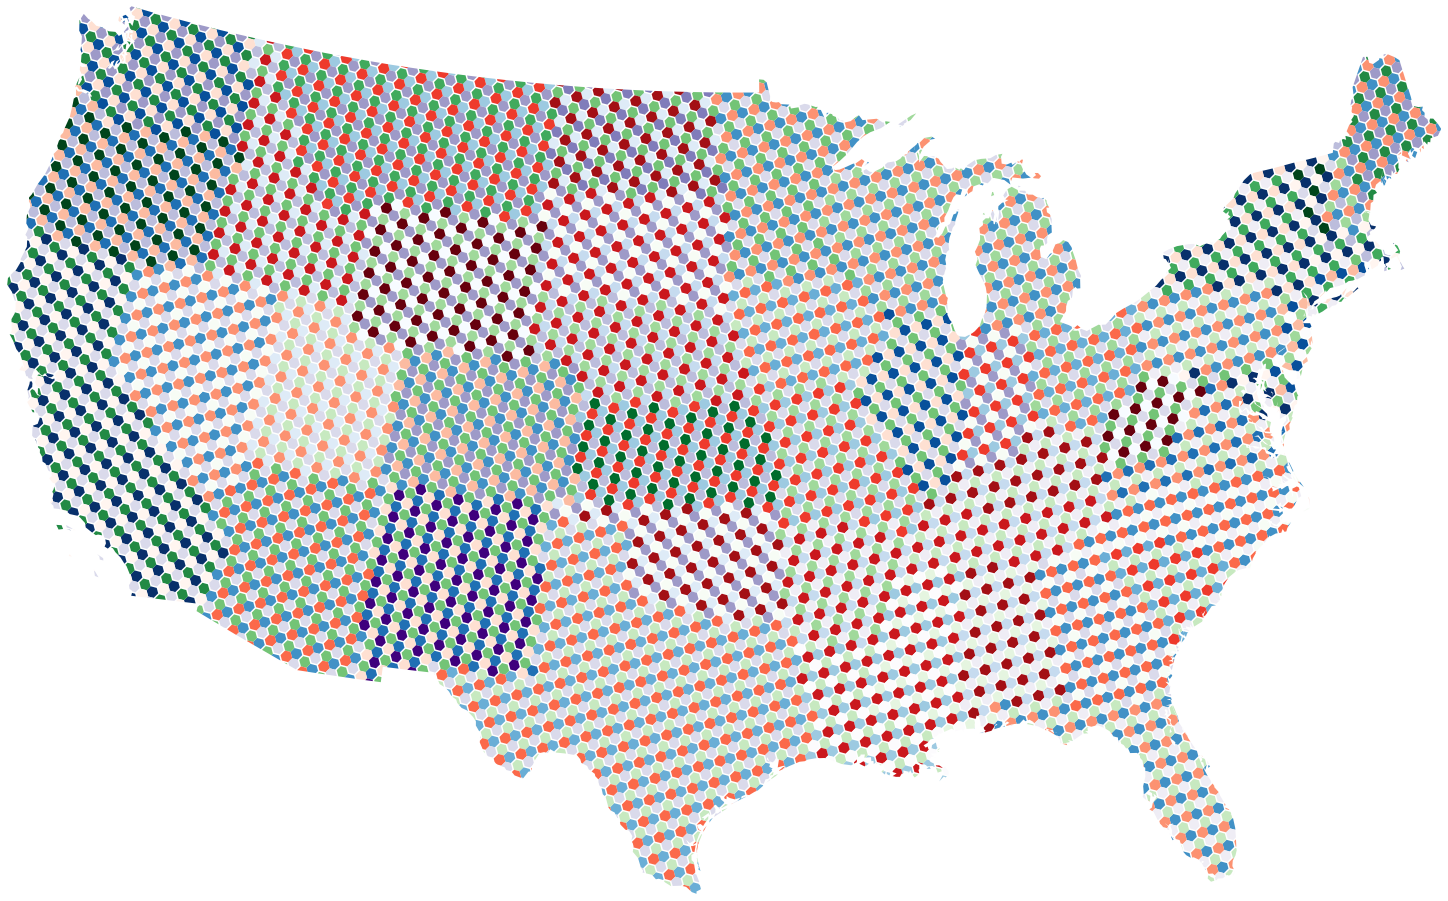

In [186]:
fig = election_map.render(legend = False, dpi = 90, k = 9)
fig.savefig("NZCS-Aug-2022/slides/images/election-2016-weave.png", dpi = 90)